# **ANN Linear Regression Prediction**
* **Contributor- Individual**
* **Name- Vikash Kumar Diwakar**

In [90]:
# importing basic libraries
import pandas as pd
import numpy as np

In [91]:
# importing dataset
df=pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/main/Admission_Prediction.csv')

In [92]:
# viewing first five rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [93]:
# checking number of rows and columns
df.shape

(500, 9)

* **There are 500 Rows and 9 Columns**

In [94]:
# checking null values
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

* **Null values are present in `GRE Score`,`TOEFL Score`,`University Rating`**

## **Filling Null Values**

In [95]:
df['GRE Score']=df['GRE Score'].fillna(df['GRE Score'].median())

In [96]:
df['TOEFL Score']=df['TOEFL Score'].fillna(df['TOEFL Score'].median())

In [97]:
df['University Rating']=df['University Rating'].fillna(df['University Rating'].mode()[0])

In [98]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [99]:
# checking duplicate rows
df.duplicated().sum()

0

In [100]:
# dropping irrelevant columns
df.drop(columns=['Serial No.'],inplace=True)

In [101]:
df.sample(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
314,305.0,105.0,2.0,3.0,4.0,8.13,0,0.66


In [102]:
# splitting the data
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [103]:
# importing train test split
from sklearn.model_selection import train_test_split

# implenting train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [104]:
# lets see the splitted data
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310.0,104.0,3.0,2.0,3.5,8.37,0
438,318.0,110.0,3.0,2.5,3.5,8.54,1
475,300.0,101.0,3.0,3.5,2.5,7.88,0
58,300.0,99.0,1.0,3.0,2.0,6.80,1
380,322.0,104.0,3.0,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307.0,110.0,4.0,4.0,4.5,8.37,0
72,321.0,111.0,5.0,5.0,5.0,9.45,1
396,325.0,107.0,3.0,3.0,3.5,9.11,1
235,326.0,111.0,5.0,4.5,4.0,9.23,1


In [105]:
# scaling the data with minmax scaler because there are upper and lower bounds in the data
from sklearn.preprocessing import MinMaxScaler   #importing min max scaler
scaler=MinMaxScaler()                            #creating object for scaling the data


# scaling the data
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [106]:
# lets see if the data is scaled or not
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.5       , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

* Successfuly scaled the data

In [107]:
# importing keras
from keras import Sequential

# importing layers
from keras.layers import Dense

In [108]:
# creating model object
model=Sequential()


# defining our ANN model
model.add(Dense(7,activation='relu',input_dim=7)) #input layer
model.add(Dense(7,activation='relu'))             #hidden layer
model.add(Dense(1,activation='linear'))           #output layer

In [109]:
# priniting summary to get to see the total number of parameters involved
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 7)                 56        
                                                                 
 dense_10 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
# compiling the model
model.compile(loss='mean_squared_error',optimizer='Adam')

In [111]:
# running our ANN model for given epochs
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 0.2296 - val_loss: 0.2184
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1582 - val_loss: 0.1393
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0970 - val_loss: 0.0801
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0546 - val_loss: 0.0447
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0378 - val_loss: 0.0350
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0306 - val_loss: 0.0272
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0221 - val_loss: 0.0201
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0155 - val_loss: 0.0146
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.0108
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0102 - val_loss: 0.0088
Epoch 11

In [112]:
# storing the predicted data
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [113]:
# evaluation metrics
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7812274389621173

* **Our model is giving 78% accuracy.**

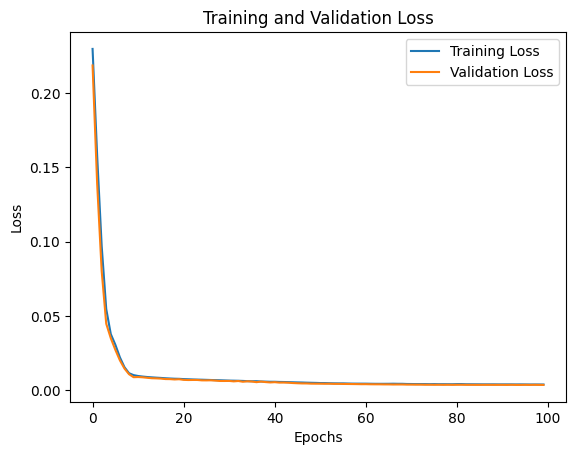

In [114]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss');

* **We can see the losses decreases drastically and also our model is not overfitted.**

*~Thankyou*